## 데이터 사이언스 튜토리얼

데이터 사이언스에는 다양한 업무가 있습니다. 

캐글과 매칭시켜보면 다음과 같습니다.

- 데이터 수집 및 데이터셋 제작 => datasets
- 데이터 분석 및 데이터 시각화 => notebooks
- 머신러닝/딥러닝 => competitions

이런 기본 프로세스들을 Python으로 하는 방법을 소개합니다.

## 1. 데이터 수집 및 데이터셋 제작

데이터 수집은 다양한 방식으로 이루어집니다. 

- 서비스 로그
- 다양한 센서 정보

처음부터 데이터를 수집하는 방법이 있는 반면에, 기존에 있는 웹의 데이터를 원하는 형태로 모으는 방법도 있습니다.
웹에서 정보를 수집하는 행위를 **웹크롤링(web crawling)** 이라고 합니다.

웹크롤링은 사이트의 정보보호 정책에 따라 불법인 경우가 있으니 주의해야합니다. 
일반적으로 허가없이 크롤링하여 사용한 정보는 상업적/연구로 활용할 수 없으니 참고하시기 바랍니다.

- [‘무단 크롤링’으로 야놀자 정보 빼간 여기어때 [법알못 판례 읽기]](https://magazine.hankyung.com/business/article/202108256209b)


### 1.1 Requests : 웹에 정보 요청

우선 웹에서 정보를 불러오기 위해서는 `requests`라는 라이브러리를 사용합니다.

`request`는 HTTP용 라이브러리입니다. 서버에서 정보를 받아오거나, 서버에 정보를 보내는 등의 일을 할 수가 있습니다.

이번에는 받는 용도로만 사용해보도록 하겠습니다.

In [ ]:
import requests

이번 예시는 BTS라는 정보를 사용하여 크롤링을 진행해보도록 하겠습니다.

BTS에 관한 다양한 정보 중 위키피디아의 정보를 활용해보도록 하겠습니다.

- https://en.wikipedia.org/wiki/BTS

get함수를 사용하여 정보를 불러올 수 있습니다.

In [ ]:
URL = "https://en.wikipedia.org/wiki/BTS" # url 링크를 변수로 할당
data = requests.get(URL)
print(data)

<Response [200]>


데이터를 확인해봅시다.

그냥 데이터를 출력하면 `<Response [200]>`과 같은 내용이 출력됩니다. 이 Reponse는 서버에 보낸 정보에 대한 응답입니다.

대표적으로는 다음과 같은 응답이 존재합니다.

- `200` : 2XX는 성공입니다. 
- `404` : 4XX는 실패입니다. 그 중에서도 404는 페이지가 없는 경우 메세지입니다.
- `503` : 5XX는 서버 오류입니다. 그 중에서도 503은 서비스를 사용할 수 없는 경우입니다. 크롤링을 막아둔 사이트에서 크롤링을 시도할 때 보실 수 있습니다.

In [ ]:
print(data) 

<Response [200]>


요청한 정보를 보기 위해서는 content 또는 text 요소를 봐야합니다.

텍스트 정보가 매우 기니 앞의 100자만 살펴보도록 하겠습니다.

In [ ]:
print(data.text[:1000]) # 내용이 길기 때문에 앞에 100자만 확인

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>BTS - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"a8ae1615-6425-4313-90a8-b00c44ca9e69","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"BTS","wgTitle":"BTS","wgCurRevisionId":1058368373,"wgRevisionId":1058368373,"wgArticleId":39862325,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 uses Japanese-language script (ja)","CS1 Japanese-language sources (ja)","CS1 uses Korean-language script (ko)","CS1 Korean-language sources (ko)","Good articles","Articles with 

크롤링되는 정보는 HTML 형태로 정보를 받아옵니다. 이를 기본적은 `split`, `find` 등의 문자열 내장 메서드를 사용해서 찾을수도 있지만 좀 더 효율적으로 찾을 수도 있습니다.

### 1.2 BeautifulSoup : 원하는 정보 추출

`BeautifulSoup`은 대표적은 HTML문서 파싱 도구입니다.

**파싱(parsing)**이란 정보를 구조화하는 작업을 의미합니다. 

예를 들어 `나는 학교에 간다`라는 문장에서 `나`가 주어임을 뽑을 수 있는 것처럼 HTML코드에서도 그런 정보를 뽑아낼 수 있습니다.

In [ ]:
# 설치가 필요하다면 아래 문서의 주석을 지우고 pip로 설치하면 됩니다.
# kaggle에는 이미 설치되어 있습니다.
# !pip install beautifulsoup4 

사용은 아래와 같이 합니다. 

뒤의 `html.parser`는 정보를 파싱하는 방법에 대한 변수인데 현재는 신경쓸 필요가 없습니다.

In [ ]:
from bs4 import BeautifulSoup
bs = BeautifulSoup(data.text, "html.parser")
print(type(bs))

<class 'bs4.BeautifulSoup'>


우선 이렇게 html정보를 beautifulsoup으로 감쌌는데 어떤 것을 할 수 있을까요?

- `find` : 태그를 찾아주는 메소드
- `find_all` : 태그를 모두 찾아주는 메소드

예시로 아래는 h1 태그가 있는 html요소를 찾기 위한 코드입니다.

In [ ]:
bs.find('h1')

<h1 class="firstHeading" id="firstHeading">BTS</h1>

h1 태그는 일반적으로 사이트에서 제목에 사용됩니다. 그렇기에 위에서는 BTS라는 제목에서 한 번 사용하게 되는 것입니다.

일반적으로 중간 제목들은 h2 태그를 사용합니다. h2 태그로 작성된 제목을 모두 확인해보겠습니다.

In [ ]:
bs.find_all('h2')

[<h2 id="mw-toc-heading">Contents</h2>,
 <h2><span class="mw-headline" id="Name">Name</span></h2>,
 <h2><span class="mw-headline" id="Career">Career</span></h2>,
 <h2><span class="mw-headline" id="Artistry">Artistry</span></h2>,
 <h2><span class="mw-headline" id="Legacy_and_cultural_impact">Legacy and cultural impact</span></h2>,
 <h2><span class="mw-headline" id="Commercial_endorsements">Commercial endorsements</span></h2>,
 <h2><span class="mw-headline" id="Awards_and_achievements">Awards and achievements</span></h2>,
 <h2><span class="mw-headline" id="Members">Members</span></h2>,
 <h2><span class="mw-headline" id="Discography">Discography</span></h2>,
 <h2><span class="mw-headline" id="Filmography">Filmography</span></h2>,
 <h2><span class="mw-headline" id="Concert_tours">Concert tours</span></h2>,
 <h2><span class="mw-headline" id="See_also">See also</span></h2>,
 <h2><span class="mw-headline" id="References">References</span></h2>,
 <h2><span class="mw-headline" id="External_link

소제목처럼 보이는 내용들을 리스트에 담아 모두 가져온 것을 확인할 수 있습니다. 

해당 태그에서 태그를 제외하고 텍스트 정보를 추출하기 위해서는 다음과 같이 추출할 수 있습니다. 

In [ ]:
for val in bs.find_all('h2'):
    print(val)
    print(val.text)
    print()

<h2 id="mw-toc-heading">Contents</h2>
Contents

<h2><span class="mw-headline" id="Name">Name</span></h2>
Name

<h2><span class="mw-headline" id="Career">Career</span></h2>
Career

<h2><span class="mw-headline" id="Artistry">Artistry</span></h2>
Artistry

<h2><span class="mw-headline" id="Legacy_and_cultural_impact">Legacy and cultural impact</span></h2>
Legacy and cultural impact

<h2><span class="mw-headline" id="Commercial_endorsements">Commercial endorsements</span></h2>
Commercial endorsements

<h2><span class="mw-headline" id="Awards_and_achievements">Awards and achievements</span></h2>
Awards and achievements

<h2><span class="mw-headline" id="Members">Members</span></h2>
Members

<h2><span class="mw-headline" id="Discography">Discography</span></h2>
Discography

<h2><span class="mw-headline" id="Filmography">Filmography</span></h2>
Filmography

<h2><span class="mw-headline" id="Concert_tours">Concert tours</span></h2>
Concert tours

<h2><span class="mw-headline" id="See_also">Se

위의 h2 태그를 보면 좀 더 구체적으로는 span 태그에 mw-headline이라는 class를 가지고 있는 것을 확인할 수 있습니다.

html은 태그의 종류, class, id를 사용하여 정보를 구분하기에 이런 정보들을 가지고도 데이터를 추출할 수 있습니다.

In [ ]:
bs.find_all('span', {'class':'mw-headline'})

[<span class="mw-headline" id="Name">Name</span>,
 <span class="mw-headline" id="Career">Career</span>,
 <span class="mw-headline" id="2010–2014:_Formation_and_early_years">2010–2014: Formation and early years</span>,
 <span class="mw-headline" id="2014–2017:_Mainstream_and_international_breakthrough">2014–2017: Mainstream and international breakthrough</span>,
 <span class="mw-headline" id="Moderate_success_and_first_concert_tour">Moderate success and first concert tour</span>,
 <span class="mw-headline" id="Mainstream_breakthrough_and_commercial_success">Mainstream breakthrough and commercial success</span>,
 <span class="mw-headline" id="International_expansion_and_collaborations">International expansion and collaborations</span>,
 <span class="mw-headline" id="2018–2020:_Continued_worldwide_success">2018–2020: Continued worldwide success</span>,
 <span class="mw-headline" id="Worldwide_recognition_and_Love_Yourself_album_series">Worldwide recognition and <i>Love Yourself</i> album 

방탄소년단의 각 멤버 정보를 가져오기 위해서는 어떤 방법을 사용할 수 있을까요?

In [ ]:
# 방탄 멤버별로 크롤링하기?

## 2. 데이터 분석 및 시각화

데이터 분석도 다양한 통계 방법론이나 기법을 사용하여 진행할 수 있습니다.

일반적으로 데이터 분석의 시작은 통계값을 뽑고, 이를 시각화하여 나타내는 것으로 시작합니다.

- `numpy` : 행렬 연산 라이브러리
- `pandas` : 엑셀 형태의 데이터 연산 라이브러리
- `matplotlib` : 데이터 시각화 라이브러리 
- `seaborn` : 통계 정보 시각화 라이브러리

데이터 분석 및 머신러닝에서 가장 유명한 데이터셋인 [타이타닉 생존자 데이터셋](https://www.kaggle.com/c/titanic)을 사용해보겠습니다. 

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### 2.1 [Pandas] 데이터 살피기 기본

pandas로 데이터를 살펴볼 때는 크게 3가지를 할 수 있습니다.

- `head()` : 첫 5개
- `tail()` : 마지막 5개
- `info()` : 데이터가 가지고 있는 정보
- `describe()` : 데이터의 통계치

In [ ]:
train = pd.read_csv('../input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


데이터를 보며 제일 중요한 것은 컬럼명을 살피며 어떤 정보가 어떤 형태로 들어있는지 확인하는 것이다.

### 2.2 [Pandas] 컬럼별로 정보 다루기

데이터 분석을 위해서는 있는 값에 연산을 취해서 변경해야하는 상황이 많습니다.

예시로 해당 데이터에서 한 사람의 가족 데이터는 형제자매(SibSp)와 부모자녀(Parch)로 나눠져있습니다.

이를 사용해 가족 크기 컬럼을 만들 수 있습니다.

In [ ]:
train['FamilySize'] = train['SibSp'] + train['Parch']

또는 나이정보를 나이대 정보로 변환해서 10대, 20대 등의 정보를 구분해서 살펴볼 수도 있습니다

이는 apply라는 메서드를 사용해서 바꿀 수 있습니다.

In [ ]:
def age_band(age):
    for i in range(1, 10):
        if age < i*10 : 
            return f'{(i-1)*10} ~ {i*10-1}'

print(age_band(20))

train['AgeBand'] = train['Age'].apply(age_band)

20 ~ 29


바뀐 데이터셋을 확인해봅시다.

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,20 ~ 29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,30 ~ 39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,20 ~ 29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,30 ~ 39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,30 ~ 39


### 2.3 [Pandas] 데이터에서 정보를 얻어내기 쉬운 테크닉

엑셀/스프레드시트처럼 다양한 정보를 뽑아내고 싶다면 다양한 메서드를 사용할 수 있습니다.

- `value_counts` : 개수 카운팅
    - `mean`, `max`, `min`, `medium` 등의 대푯값도 사용가능
- `groupby` : 그룹으로 묶기

In [ ]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

개수에 따라 자동 정렬되고 만약 카테고리별로 정렬하고 싶다면 정렬을 추가로 진행할 수 있습니다.

In [ ]:
train['Pclass'].value_counts().sort_index()

1    216
2    184
3    491
Name: Pclass, dtype: int64

생존확률을 계산하기 위해 다음과 같이 진행할 수도 있습니다.

1. 성별으로 묶는다.
2. 생존 여부 데이터를 불러온다.
3. 성별에 따라 생존여부의 평균을 구한다.

In [ ]:
train.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

좀 더 그룹을 디테일하게 묶을 수도 있습니다.

In [ ]:
train.groupby(['Pclass', 'Sex'])['Survived'].mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

위의 정보를 DataFrame으로 묶으면 테이블 형식으로 볼 수 있습니다.

In [ ]:
pd.DataFrame(train.groupby(['Pclass', 'Sex'])['Survived'].mean())

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

조금 더 많은 테크닉을 사용하여 pandas의 DataFrame에 디자인을 추가할 수도 있습니다.

In [ ]:
pd.DataFrame(train.groupby(['Pclass', 'Sex'])['Survived'].mean()).style.bar(subset=['Survived'], color='#205ff2')

### 2.4 [matplotlib] 시각화해보기

위에서 분석한 데이터를 테이블 형태보다 더 좋은 형태로 바꾸면 더 의사소통이 빠를 수 있습니다.

시각화에는 정말 다양한 종류의 시각화가 있습니다. 궁금하신 분은 아래의 사이트에서 다양한 시각화를 살펴보시는 것을 추천합니다.

- https://datavizproject.com/

크게는 3가지 시각화가 대표적입니다.

- `plt.plot` : 꺾은선그래프 
- `plt.bar` : 막대그래프
- `plt.scatter` : 

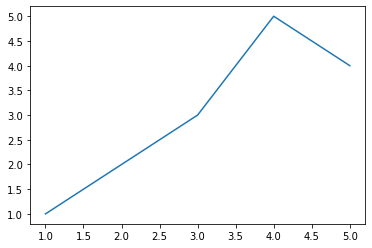

In [ ]:
plt.plot([1, 2, 3, 4, 5], [1, 2, 3, 5, 4])

<BarContainer object of 5 artists>

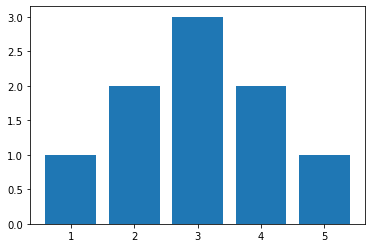

In [ ]:
plt.bar([1, 2, 3, 4, 5], [1, 2, 3, 2, 1])

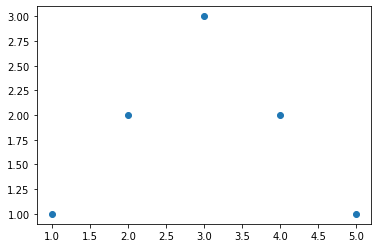

In [ ]:
plt.scatter([1, 2, 3, 4, 5], [1, 2, 3, 2, 1])

### 2.5 [matplotlib] 막대그래프 점진적 개선

종류에 따른 생존 확률을 막대그래프로 그려보도록 하겠습니다.

In [ ]:
ratio = train.groupby('Sex')['Survived'].mean()
ratio

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

아까는 plt의 함수를 사용하여 그렸지만 이번에는 객체지향에 더 가깝게 시각화를 그려봅니다.

`fig`는 전체 판, `ax`는 차트가 그려지는 공간이라고 생각하면 됩니다.

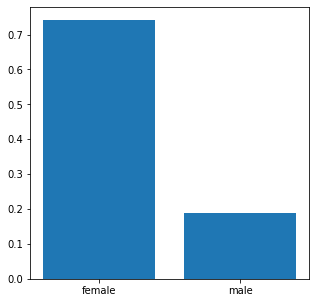

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.bar(ratio.index, ratio.values)
plt.show()

제목을 추가하고, 각 축에 레이블을 달아보겠습니다.

- `set_title`
- `set_xlabel`
- `set_ylabel`

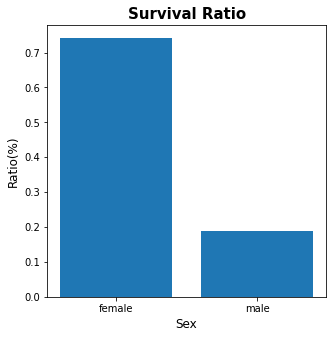

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.bar(ratio.index, ratio.values)
ax.set_title('Survival Ratio', fontsize=15, fontweight='bold')
ax.set_xlabel('Sex', fontsize=12)
ax.set_ylabel('Ratio(%)', fontsize=12)
plt.show()

막대에 색을 추가 및 두께를 조정하고, y축의 범위도 조정해보겠습니다.

그리고 상단과 우측 테두리도 제거해보겠습니다.

- ax.bar에 color 요소 추가
- set_ylim
- spines

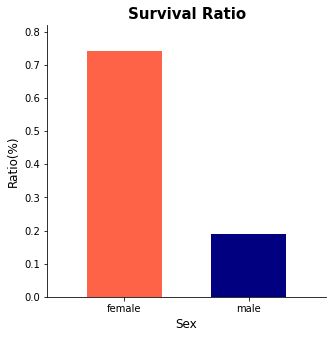

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.bar(ratio.index, ratio.values, color=['tomato', 'navy'], width=0.6)
ax.set_title('Survival Ratio', fontsize=15, fontweight='bold')
ax.set_xlabel('Sex', fontsize=12)
ax.set_ylabel('Ratio(%)', fontsize=12)
ax.margins(0.2)
ax.set_ylim(0, 0.82)
ax.spines[['top', 'right']].set_visible(False)

plt.show()

위에는 비교적 초라하지만 이런 시각화를 조금 더 열심히하면 다음과 같이 만들 수 있습니다. 

아래는 나이대별 시각화의 예시입니다.

- [🕶 Awesome Visualization with Titanic Dataset📊](https://www.kaggle.com/subinium/awesome-visualization-with-titanic-dataset)

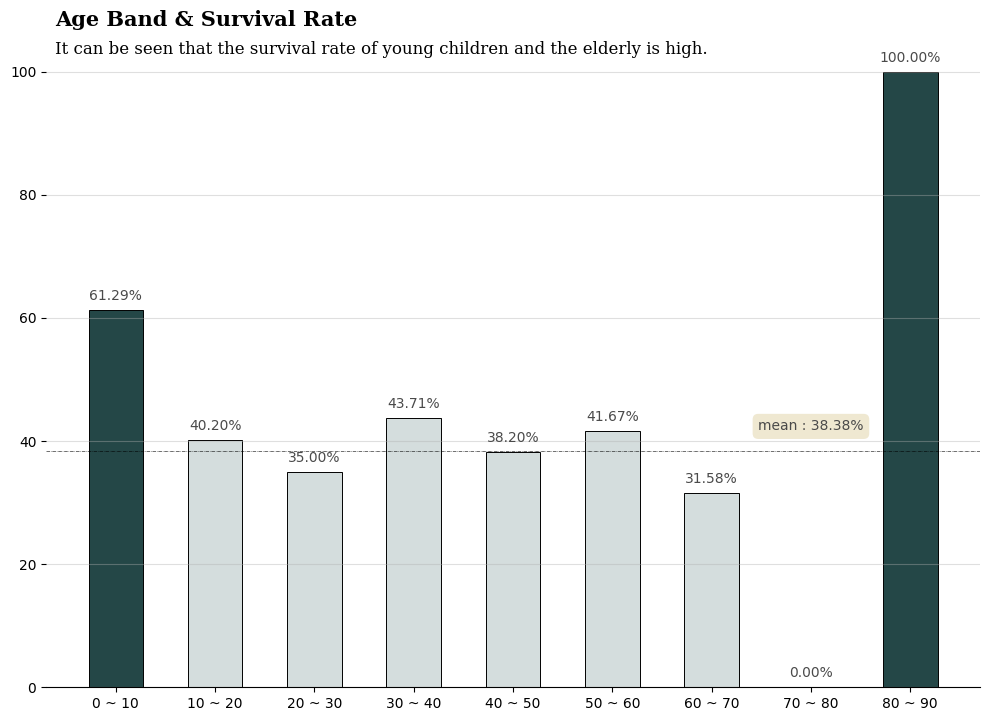

In [ ]:
def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

train['age_band'] = train['Age'].apply(age_band)
titanic_age = train[['age_band', 'Survived']].groupby('age_band')['Survived'].mean().sort_index()*100

# 시각화 시작
fig, ax = plt.subplots(1, 1, figsize=(10, 7), dpi=100)

# 막대별 색
color_map = ['#d4dddd' for _ in range(9)]
color_map[0] = color_map[8] = '#244747' # color highlight

# 막대그래프
ax.bar(titanic_age.index, titanic_age, 
       color=color_map, width=0.55, 
       edgecolor='black', 
       linewidth=0.7)


# 테두리 조정
for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)


# 주석처리
for i in titanic_age.index:
    ax.annotate(f"{titanic_age[i]:.02f}%", 
                   xy=(i, titanic_age[i] + 2.3),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')

mean = train['Survived'].mean() * 100

# 가로 평균선
ax.axhline(mean ,color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"mean : {mean :.4}%", 
            xy=('70 ~ 80', mean + 4),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))
    

# 제목과 부제목
fig.text(0.06, 1, 'Age Band & Survival Rate', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.06, 0.96, 'It can be seen that the survival rate of young children and the elderly is high.', fontsize=12, fontweight='light', fontfamily='serif')

# 격자 그리드
grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)

plt.tight_layout()
plt.show()

### 2.6 [Seaborn] 디자인을 못해도 알아서 통계 시각화

Seaborn은 matplotlib 기반의 시각화라이브러리입니다. 다만 통계 정보를 보기 위해 다양한 편리한 시각화 함수들이 포함되어 있는데 몇 가지 살펴보도록 하겠습니다.

- countplot
- kdeplot/histplot
- displot

그 외에도 엄청나게 많습니다.

- https://seaborn.pydata.org/index.html

<AxesSubplot:xlabel='Sex', ylabel='count'>

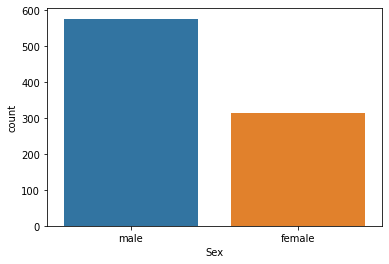

In [ ]:
sns.countplot(x='Sex', data=train)

<AxesSubplot:xlabel='Sex', ylabel='count'>

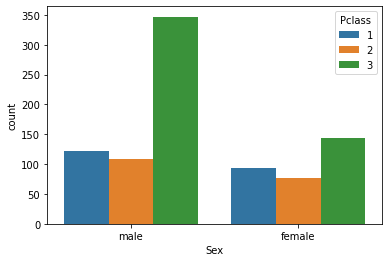

In [ ]:
sns.countplot(x='Sex', data=train, hue='Pclass')

<AxesSubplot:xlabel='Age', ylabel='Density'>

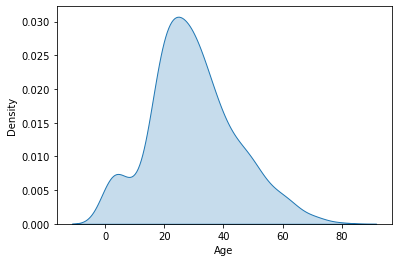

In [ ]:
sns.kdeplot(x='Age', data=train, fill=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

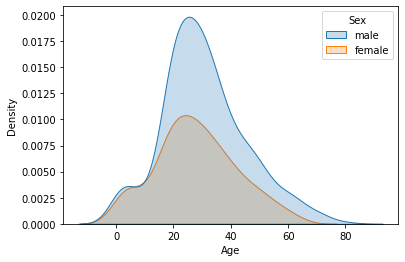

In [ ]:
sns.kdeplot(x='Age', data=train, hue='Sex', fill=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

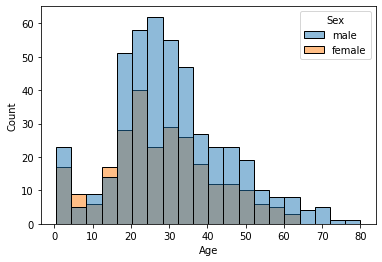

In [ ]:
sns.histplot(x='Age', data=train, hue='Sex')

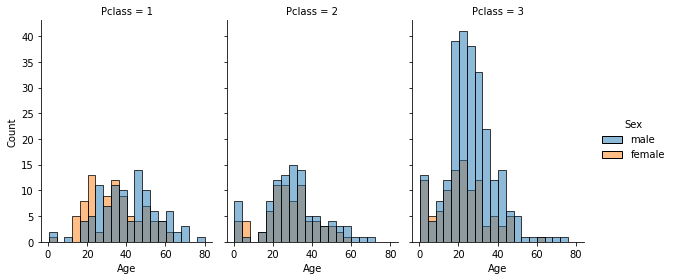

In [ ]:
sns.displot(
    data=train, x="Age", hue="Sex", col="Pclass",
    kind="hist", height=4, aspect=.7,
)

## 3. 머신러닝

다양한 머신러닝 라이브러리가 존재합니다. 대표적으로 사용하는 라이브러리는 사이킷런(sckit-learn)이고 `sklearn`으로 사용합니다.

일반적으로 sklearn을 호출하기보다는 sklearn의 다양한 모듈을 구체적으로 import하는 경우가 많습니다.

### 3.1 데이터 불러오기 및 전처리

In [ ]:
train = pd.read_csv('../input/titanic/train.csv') 
test = pd.read_csv('../input/titanic/test.csv')

display(train.head(3))
display(test.head(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


머신러닝에서 크게 해야하는 작업 2가지

1. 결측치가 있는가?
2. 수치형 데이터로 어떻게 변환할 것인가?

결측치가 있거나, 범주형데이터가 있어도 되는 머신러닝 라이브러리도 있으나 대부분은 해결해야합니다.

또한 머신러닝에 크게 도움이 안될 것 같은 항목도 제거합니다.

In [ ]:
train = train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test = test.drop(['Name','Ticket'], axis=1)

결측치가 너무 많은 경우는 컬럼을 아에 제거합니다.

In [ ]:
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

적당히 빈 값은 합당하다고 생각하는 방법으로 채울 수 있습니다.

- 최소/최대로 채우기
- 평균 또는 중앙값 등으로 채우기
- 최빈값으로 채우기

In [ ]:
train["Fare"].fillna(0, inplace=True)
test["Fare"].fillna(0, inplace=True)

In [ ]:
train["Age"].fillna(train["Age"].mean() , inplace=True)
test["Age"].fillna(train["Age"].mean() , inplace=True)

In [ ]:
train["Embarked"].fillna('S', inplace=True)
test["Embarked"].fillna('S', inplace=True)

수치형 변환은 다양한 방식으로 할 수 있는데 일부 바꿀 값들이 정해져있다면 `map` 메서드도 좋은 선택지입니다.

In [ ]:
embarked_dct = {'S':0, 'C':1, 'Q':2}
train['Embarked'] = train['Embarked'].map(embarked_dct)
test['Embarked'] = test['Embarked'].map(embarked_dct)

sex_dct = {'male':0, 'female':1}
train['Sex'] = train['Sex'].map(sex_dct)
test['Sex'] = test['Sex'].map(sex_dct)

머신러닝을 돌리기 위해서는 정답(target)과 그 외 데이터를 구분해서 사용한다.

In [ ]:
X_train = train.drop("Survived",axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId",axis=1).copy()

### 3.2 [sklearn] 머신러닝 라이브러리 사용하기

대표적인 알고리즘 2가지를 사용해서 결과를 확인해보겠습니다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)

0.9820426487093153

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)
knn.score(X_train, Y_train)

0.8058361391694725

### 3.3 최종 제출

최종적으로 제출 포맷에 맞춰 제출합니다.

In [ ]:
Y_pred = random_forest.predict(X_test)
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)